In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
mob=pd.read_csv(r"C:\Users\Nikita\Downloads\MarketPositioningofMobile\Market Positioning of Mobile\Dataset\Mobile_data.csv")

In [3]:
mob

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [4]:
mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [5]:
mob.describe(percentiles=[0.01,.02,.03,.04,.05,.25,.5,.75,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,510.00,524.96,538.97,556.92,570.95,851.75,1226.0,1615.25,1930.15,1946.08,1961.06,1974.00,1987.00,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.50,0.50,0.50,0.50,0.50,0.70,1.5,2.20,2.80,2.90,2.90,2.90,3.00,3.0
fc,2000.0,4.30950,4.341444,0.0,0.00,0.00,0.00,0.00,0.00,1.00,3.0,7.00,13.00,14.00,15.00,16.00,16.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,2.00,2.00,3.00,4.00,5.00,16.00,32.0,48.00,61.00,62.00,63.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.10,0.10,0.10,0.10,0.10,0.20,0.5,0.80,1.00,1.00,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,80.00,82.00,83.00,84.00,86.00,109.00,141.0,170.00,196.00,197.00,198.00,199.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,1.00,1.00,1.00,1.00,1.00,3.00,4.0,7.00,8.00,8.00,8.00,8.00,8.00,8.0
pc,2000.0,9.91650,6.064315,0.0,0.00,0.00,0.00,0.00,0.00,5.00,10.0,15.00,20.00,20.00,20.00,20.00,20.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,15.00,30.98,45.97,58.00,70.95,282.75,564.0,947.25,1485.05,1568.04,1618.03,1698.00,1791.01,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,512.99,526.96,542.00,562.00,579.85,874.75,1247.0,1633.00,1929.05,1947.00,1963.00,1974.00,1987.00,1998.0


In [6]:
y=mob["price_range"]
x=mob.drop(["price_range"], axis=1)

In [7]:
train_x, test_x, train_y, y_test=train_test_split(x,y,test_size=.3, random_state=88)

In [8]:
knn=KNeighborsClassifier(n_neighbors=5, p=2)

In [9]:
help(knn)

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors o

In [10]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)
print("Train Score",knn.score(train_x, train_y))
print("Test Score",knn.score(test_x, y_test))

Train Score 0.9521428571428572
Test Score 0.9183333333333333


In [11]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(train_x, train_y)
print("Train Score",knn.score(train_x, train_y))
print("Test Score",knn.score(test_x, y_test))

Train Score 0.95
Test Score 0.9416666666666667


In [12]:
def myKNN(kn, verbose=True):  # verbos is used when u want to print in the function when print is reqired till the result is true 
    k=[]
    train_acc=[]
    test_acc=[]
    for i in range(1,kn,2):
        knni=KNeighborsClassifier(n_neighbors=i)
        knni.fit(train_x, train_y)
        k.append(i)
        ktt=knni.score(train_x, train_y)
        ktst=knni.score(test_x, y_test)
        diff=ktt-ktst
        train_acc.append( ktt)
        test_acc.append( ktst)
        if verbose:
            print(f"for k= {i} : train score { round(ktt,3)} and test score {round( ktst,3)}")

    plt.plot(k, train_acc, label="Train Accuracy", color="red")
    plt.plot(k, test_acc, label="Test Accuracy", color="blue")
    plt.legend()
    plt.xlabel("K")
    plt.ylabel("Scores")
    plt.show()
          
    return k, train_acc, test_acc


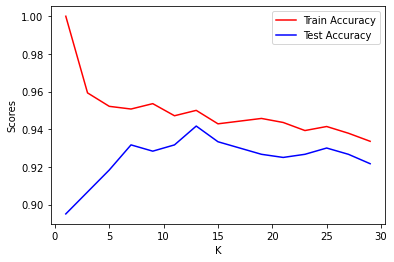

In [13]:
k, train_acc, test_acc=myKNN(30, verbose=False)